# Ejercicio 1

## Análisis Exploratorio de Datos sobre Taxis Yellow Cab

Realizaremos un análisis exhaustivo de un conjunto de datos sobre los viajes en taxi Yellow Cab en Estados Unidos durante el año 2023, en los meses correspondientes a Octubre, Noviembre y Diciembre

In [ ]:
!pip install plotly_express PyDrive2


In [ ]:
datasets_ej1 = {
    "octubre": "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-10.parquet",
    "noviembre": "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-11.parquet",
    "diciembre": "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-12.parquet"
}

In [ ]:
import requests
from concurrent.futures import ThreadPoolExecutor
def download_file(url):
    response = requests.get(url)
    if "content-disposition" in response.headers:
        content_disposition = response.headers["content-disposition"]
        filename = content_disposition.split("filename=")[1]
    else:
        filename = url.split("/")[-1]
    with open(filename, mode="wb") as file:
        file.write(response.content)


with ThreadPoolExecutor() as pool:
    pool.map(download_file, datasets_ej1.values())


In [ ]:
import seaborn as sns
import plotly_express as px
from matplotlib import pyplot as plt
import pyarrow.parquet as pq
import pandas as pd

In [ ]:
trips = pq.read_table('yellow_tripdata_2023-10.parquet')
trips_oct = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-11.parquet')
trips_nov = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-12.parquet')
trips_dec = trips.to_pandas()

### Exploración Inicial:

Verificamos que los tres DataFrame tengan exactamente las mismas columnas

In [ ]:
sorted(trips_nov.columns.to_list()) == sorted(trips_oct.columns.to_list()) == sorted(trips_dec.columns.to_list())

True

Como los tres DataFrame tienen las mismas columnas, porcedemos concatenarlos

In [ ]:
trips = pd.concat([trips_oct, trips_nov,trips_dec], axis=0, ignore_index=True)
trips.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,N,161,186,1,6.5,3.5,0.5,2.90,0.00,1.0,14.40,2.5,0.00
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,N,255,255,3,3.0,1.0,0.5,0.00,0.00,1.0,5.50,0.0,0.00
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,N,151,239,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00
5,2,2023-10-01 00:33:14,2023-10-01 00:52:12,1.0,3.15,1.0,N,238,246,1,19.8,1.0,0.5,4.46,0.00,1.0,29.26,2.5,0.00
6,2,2023-10-01 00:58:18,2023-10-01 01:01:20,2.0,0.67,1.0,N,50,50,1,5.8,1.0,0.5,2.16,0.00,1.0,12.96,2.5,0.00
7,2,2023-10-01 00:11:29,2023-10-01 00:32:55,2.0,14.93,1.0,N,208,239,1,37.3,1.0,0.5,14.77,6.94,1.0,65.76,2.5,1.75
8,1,2023-10-01 00:22:33,2023-10-01 00:34:00,0.0,3.20,1.0,N,87,249,1,16.3,3.5,0.5,4.25,0.00,1.0,25.55,2.5,0.00
9,1,2023-10-01 00:39:47,2023-10-01 00:48:48,1.0,1.30,1.0,N,125,231,1,10.0,3.5,0.5,2.00,0.00,1.0,17.00,2.5,0.00


Observamos las columnas y sus correspondientes tipos de datos

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238567 entries, 0 to 10238566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

En la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) se describe el contenido de cada columna, por lo que solo haremos mención a las columnas que requieran un interés especial.



#### VendorID
Un código que indica el proveedor de TPEP que proporcionó el registro.

La documentación indica que los posibles valores son:
  1.   Creative Mobile Technologies, LLC
  2.   VeriFone Inc



In [ ]:
trips.VendorID.value_counts(normalize=True)*100

,proportion
VendorID,
2,74.576813
1,25.409757
6,0.013430


Observamos que en los tres DataFrames aparece un valor no indicado en la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf),  correspondiente a "VendorID == 6".

Este dato no está especificado en el estándar, por lo que lo descartaremos al considerarlo erróneo y de poco peso.





In [ ]:
trips = trips.loc[trips.VendorID != 6,:]
trips.VendorID.value_counts(normalize=True)*100

,proportion
VendorID,
2,74.58683
1,25.41317


Text(0.5, 1.0, '% VendorID')

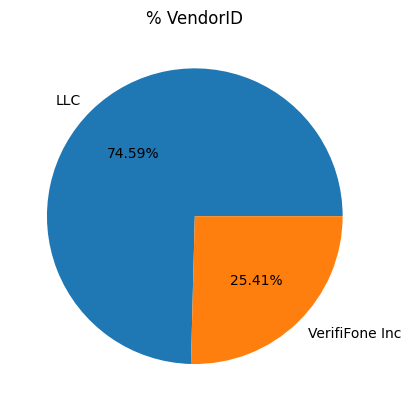

In [ ]:
labels = ["LLC","VerifiFone Inc"]
plt.pie(x=trips["VendorID"].value_counts(normalize=True)*100,autopct='%1.2f%%',labels=labels)
plt.title("% VendorID")

#### Passenger_count

Se indica que el tipo de dato es float64, lo cual puede interpretarse como una variable continua. Sin embargo, esto es incorrecto, ya que no tendría sentido medio pasajero. Esta variable debe ser numérica, es decir, int32, estamos hablando de un conjunto numerable.

In [ ]:
trips["passenger_count"].value_counts()

,count
passenger_count,
1.0,7341790
2.0,1505162
3.0,368424
4.0,224696
0.0,130527
5.0,123458
6.0,76753
8.0,105
7.0,35


<ipython-input-11-247d312f9777>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


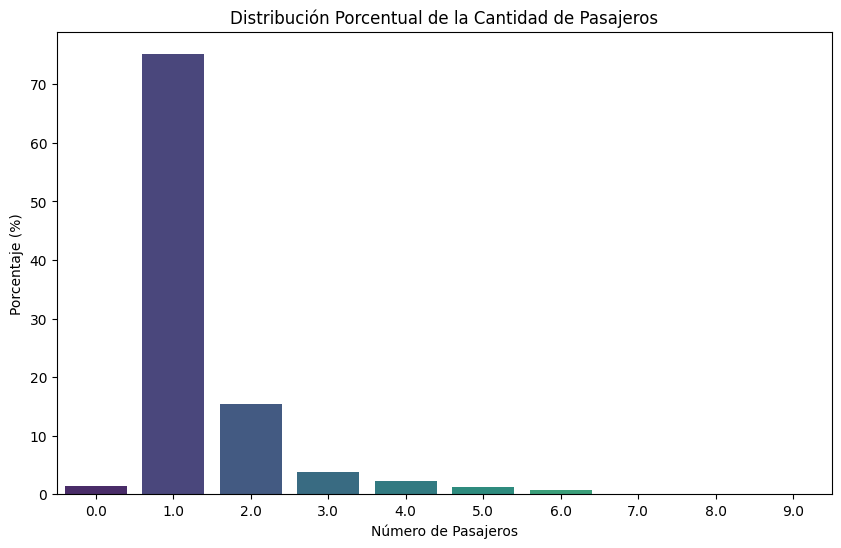

In [ ]:
counts = trips["passenger_count"].value_counts(normalize=True) * 100
counts = counts.sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.xlabel('Número de Pasajeros')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución Porcentual de la Cantidad de Pasajeros')

plt.show()

Observamos que hay una cantidad de 130527 viajes en taxi en el cual se declaró que la cantidad de pasajeros es cero. Podriamos interpretar esto como un error en el tipeo, un envio o una cancelación del viaje. Por lo tanto pasaremos a realizar un analisis con otras columnas para determinar que hacer con estos datos.



In [ ]:
trips["passenger_count"].isna().value_counts(normalize=True) *100

,proportion
passenger_count,
False,95.445704
True,4.554296


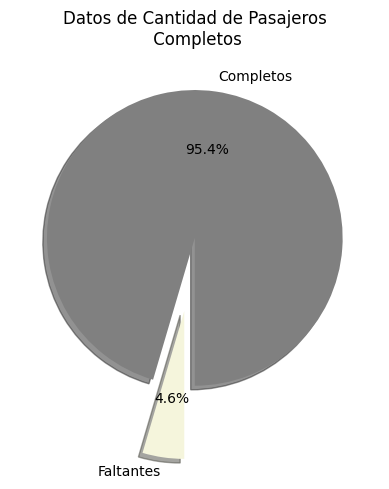

In [ ]:
values = trips["passenger_count"].isna().value_counts(normalize=True) * 100
explode = (0, 0.5)

labels = ["Faltantes" if x else "Completos" for x in values.index]

fig, ax = plt.subplots()
ax.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=270, colors=['gray', 'beige'])

plt.title('Datos de Cantidad de Pasajeros\n Completos')

plt.show()

La cantidad de datos faltantes en el DataFrame en términos de porcentaje es menor al 5%, para trabajar con estos datos podemos tomar los siguientes caminos:
  1. Eliminamos la fila completa que tiene un valor faltante (NaN)
  2. Eliminamos la columna completa
  3. Establecemos algún valor para esos valores que faltan (cero, la media, la mediana).

Eliminar la columna completa no sería una opción buena, ya que para el contexto de viajes la cantidad de pasajeros es relevante, eliminando las filas que tienen un dato NaN si bien perdemos menos del 5% de la información antes de eliminar o establecer un valor, haremos un análisis en función de otras variables.



---



#### Trip_distance

In [ ]:
trips["trip_distance"].isna().sum()

0

<Axes: ylabel='trip_distance'>

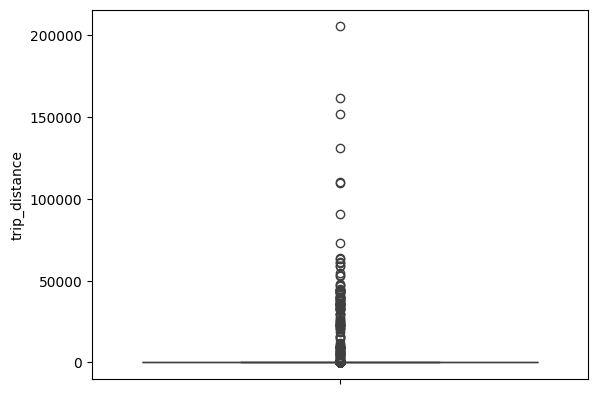

In [ ]:
sns.boxplot(y=trips["trip_distance"])

In [ ]:
trips["trip_distance"].describe()

,trip_distance
count,1.023719e+07
mean,3.747333e+00
std,1.602020e+02
min,0.000000e+00
25%,1.000000e+00
50%,1.710000e+00
75%,3.290000e+00
max,2.055442e+05


Observamos la existencia de outliers, que parecieran ser todos

La cantidad de datos para la distancia se centra entre 0 y 5 millas, presentando pocos valores para distancias superiores a 5 millas

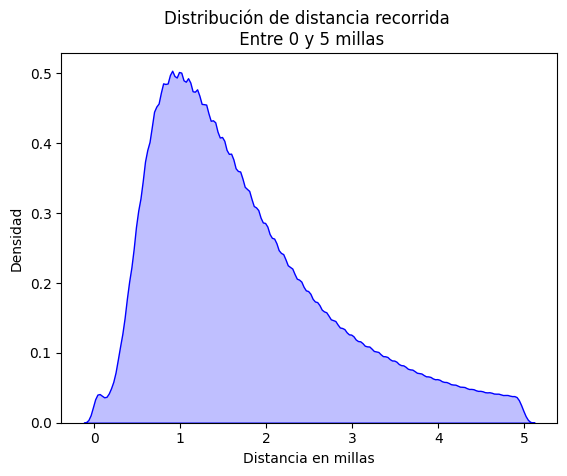

In [ ]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 5)]
sns.kdeplot(subset_trips, fill=True, color='blue')

plt.title("Distribución de distancia recorrida \n Entre 0 y 5 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()

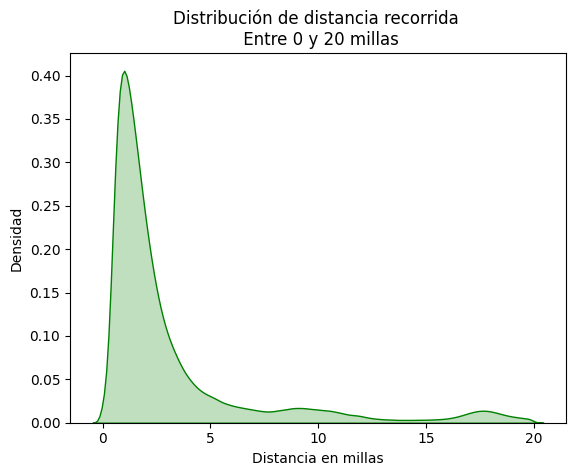

In [ ]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 20)]
sns.kdeplot(subset_trips, fill=True, color='green')

plt.title("Distribución de distancia recorrida \n Entre 0 y 20 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()

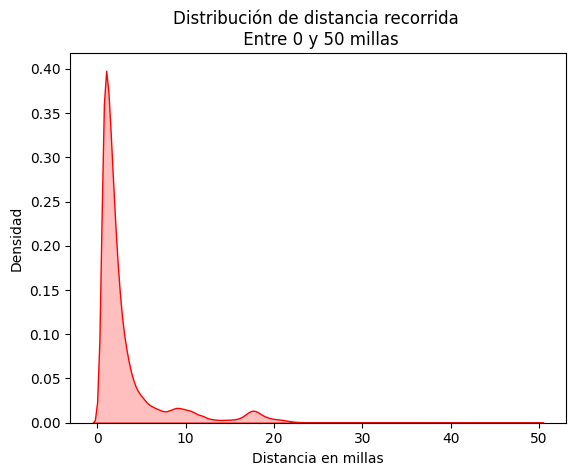

In [ ]:
subset_trips = trips["trip_distance"][(trips["trip_distance"] > 0) & (trips["trip_distance"] < 50)]
sns.kdeplot(subset_trips, fill=True, color='red')

plt.title("Distribución de distancia recorrida \n Entre 0 y 50 millas")
plt.xlabel("Distancia en millas")
plt.ylabel("Densidad")

plt.show()

<Axes: ylabel='trip_distance'>

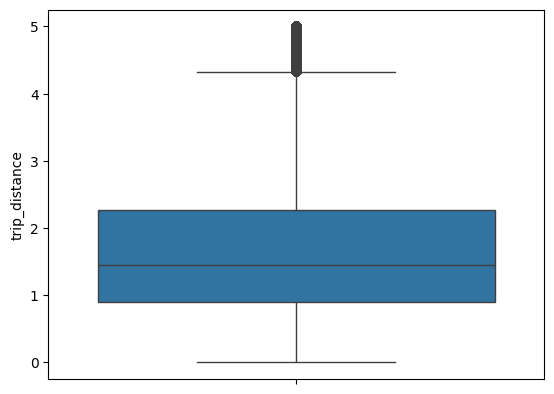

In [ ]:
trips_filter = trips.copy(deep=True)

sns.boxplot(y=trips_filter.loc[trips_filter["trip_distance"] <= 5,:]["trip_distance"])

Categorizamos las distancias, entre cortas (0 - 5 millas), medias (6 - 20) - largas (mayores a 21)

In [ ]:
def category(value):
  if value <=5:
    return "short"
  if value >5 and value <=20:
    return "medium"
  if value >=21:
    return "long"

trips["trip_distance_category"] = trips["trip_distance"].map(lambda x: category(x))

trips["trip_distance_category"].value_counts()

,count
trip_distance_category,
short,8534894
medium,1595564
long,70476


<ipython-input-19-ac49b3b5c7a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="dark")


<Axes: ylabel='proportion'>

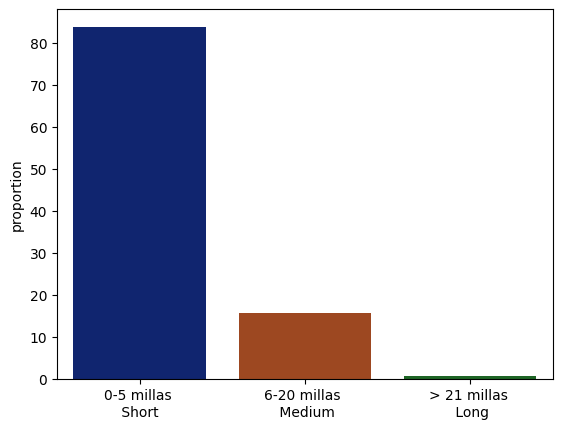

In [ ]:
values = trips["trip_distance_category"].value_counts(normalize=True) * 100

labels = ["0-5 millas \n Short ","6-20 millas \n Medium","> 21 millas \n Long"]

sns.barplot(x=labels, y=values, palette="dark")

#### Payment_type

In [ ]:
trips["payment_type"].isna().value_counts()

,count
payment_type,
False,10237192


In [ ]:
trips["payment_type"].value_counts()

,count
payment_type,
1,7955403
2,1600502
0,466232
4,150490
3,64565


Según la documentación los posibles valores son:
  1. Débito
  2. Efectivo
  3. Sin Cargo
  4. Diputa
  5. Desconocido
  6. Viaje Anulado

Encontramos un tipo de dato declarado como "cero" el cual no entra en la clasificación.

Con las variales analizadas: "Numero de pasajeros", "Distancia recorrida" y "Medio de pago", haremos un análisis multivariable para tratar los datos faltantes

In [ ]:
distance_zero = trips["trip_distance"] == 0
passenger_zero = trips["passenger_count"] == 0
payment_zero = (trips["payment_type"] == 3) | (trips["payment_type"] == 6)

trips_filter = trips.copy(deep=True)

trips_filter[distance_zero & passenger_zero & payment_zero].shape

(770, 20)

Este análisis nos da como resultado que los viajes con cero pasajeros y cero millas fueron cancelados o no cobrados, teniendo 770 casos

In [ ]:
trips_filter.loc[trips_filter["trip_distance"] == 0,["trip_distance","payment_type"]].value_counts(normalize=True) * 100

trip_distance  payment_type
0.0            0               56.996257
               1               22.972628
               2               10.556717
               3                5.122277
               4                4.352121
Name: proportion, dtype: float64

El set de datos filtrado no dice que los ningun viaje de cero millas fue cancelado, solo el 5.12% entra en la categoria de sin cargo. El 4.35% de los datos indican que para los viajes de cero millas hubo una disputa en cuanto al pago, por lo que podríamos decir que se llego a un cargo nulo, ya que no hubo recorrido, el resto fue pagado, con excepto del 57% de los viajes que indican una categoria de pago desconocida

👀 Podemos afirmar lo anterior ? Es decir, que los viajes de cero millas fueron pagados con algun medio de pago ? o que la disputa concluye en que el cargo es cero ?
Es una simplificación muy audaz, diriamos lo mismo si es que el taximetro estuvo dañada o por algun motivo no se acciono ? (razón de una disputa).
Aprovechando la columna "PULocationID"

In [ ]:
trips["PULocationID"].isna().value_counts()

,count
PULocationID,
False,10237192


Bien!! Este dato es importante, porque nos dice que el taxímetro se activó, no hubo errores en cuando es ese mecanismo.

In [ ]:
trips["DOLocationID"].isna().value_counts()

,count
DOLocationID,
False,10237192


El taxímetro se activo y desactivo correctamente

In [ ]:
trips_distance_zero = trips_filter.loc[trips_filter["trip_distance"] == 0,["trip_distance","payment_type","total_amount"]]

In [ ]:
trips_distance_zero["total_amount"].isna().value_counts()

,count
total_amount,
False,297602


In [ ]:
trips_distance_zero[trips_distance_zero["total_amount"] == 0].value_counts()

trip_distance  payment_type  total_amount
0.0            1             0.0             375
               3             0.0             215
               2             0.0             201
               4             0.0             200
               0             0.0              37
Name: count, dtype: int64

✅ Encontramos los pagos que algunos los viajes cancelados y pagados tienen un monto total pagado de cero.

Entonces, hay viajes con cero millas que si fueron pagados

In [ ]:
trips_distance_zero[trips_distance_zero["total_amount"] != 0]

,trip_distance,payment_type,total_amount
0,0.0,2,5.50
1,0.0,2,5.50
3,0.0,3,5.50
137,0.0,1,29.04
192,0.0,1,108.60
...,...,...,...
10238537,0.0,0,27.94
10238543,0.0,0,48.93
10238544,0.0,0,21.15
10238548,0.0,0,20.63


In [ ]:
def tipoDePago (tipo):
  if tipo == 1:
    return "Crédito"
  if tipo == 2:
    return "Efectivo"
  if tipo == 3:
    return "Sin Cargo"
  if tipo == 4:
    return "Disputa"
  if tipo == 5:
    return "Desconocido"
  if tipo == 6:
    return "Viaje Anulado"
  return "Sin datos"

<ipython-input-59-9a54045bd6ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["type_pay"] = data["payment_type"].map(lambda x: tipoDePago(x))
<ipython-input-59-9a54045bd6ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type_pay', y='total_amount', data=data, estimator=np.mean, palette="dark")


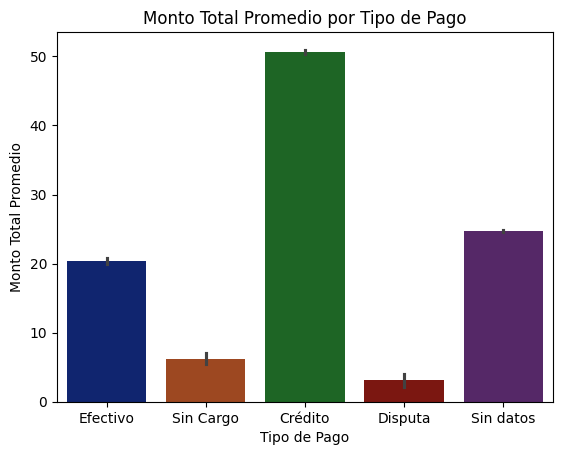

In [ ]:
import numpy as np

data = trips_distance_zero[trips_distance_zero["total_amount"] != 0]
data["type_pay"] = data["payment_type"].map(lambda x: tipoDePago(x))
sns.barplot(x='type_pay', y='total_amount', data=data, estimator=np.mean, palette="dark")

plt.title('Monto Total Promedio por Tipo de Pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Monto Total Promedio')

plt.show()

In [ ]:
(trips_distance_zero["total_amount"] < 0).value_counts()

,count
total_amount,
False,286345
True,11257


In [ ]:
trips_distance_zero.loc[trips_distance_zero["total_amount"] < 0,:].head(5)


,trip_distance,payment_type,total_amount
1619,0.0,4,-8.0
2292,0.0,3,-74.0
2444,0.0,4,-8.0
4600,0.0,4,-8.0
4784,0.0,3,-38.8


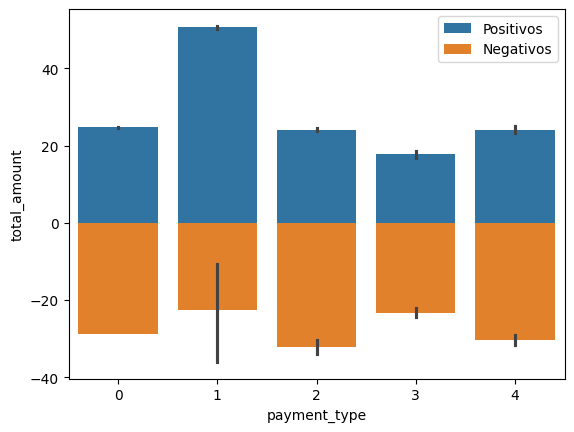

In [ ]:

sns.barplot(x='payment_type', y='total_amount', data=data_pos, label='Positivos')
sns.barplot(x='payment_type', y='total_amount', data=data_neg, label='Negativos')

plt.legend()
plt.show()

<ipython-input-71-6e4b3650d807>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pos["type_pay"] = data_pos["payment_type"].map(lambda x: tipoDePago(x))
<ipython-input-71-6e4b3650d807>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_neg["type_pay"] = data_neg["payment_type"].map(lambda x: tipoDePago(x))


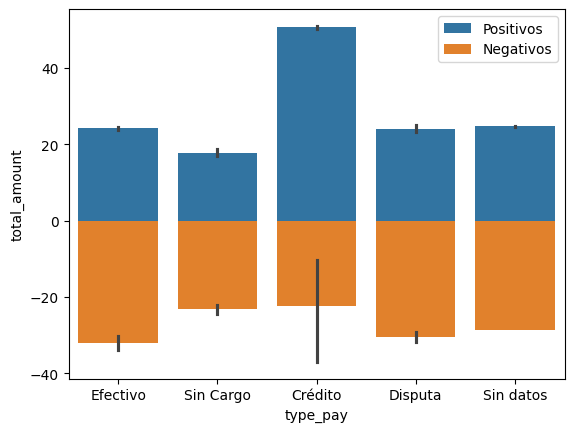

In [ ]:
data = trips_distance_zero[trips_distance_zero["total_amount"] != 0]

data_pos = data[data['total_amount'] >= 0]
data_neg = data[data['total_amount'] < 0]

data_pos["type_pay"] = data_pos["payment_type"].map(lambda x: tipoDePago(x))
data_neg["type_pay"] = data_neg["payment_type"].map(lambda x: tipoDePago(x))
sns.barplot(x='type_pay', y='total_amount', data=data_pos, label='Positivos')
sns.barplot(x='type_pay', y='total_amount', data=data_neg, label='Negativos')

plt.legend()
plt.show()

Excepto por los pagos con tarjeta de credito, los montos en positivo y negativo son proporcionales.
Hay tipos de pagos registrado como SIN CARGO que fueron pagados 🤯
Como entender los pagos en negativo ? Reembolsos ? Para la única categoría en la que esto podría ser posible es para los pagos con tarjeta de crédito si es que el viaje estuvo cargado en la memoria del vehículo, tal como indica la columna store_and_fwd_flag

In [ ]:
trips["store_and_fwd_flag"].head(5)

,store_and_fwd_flag
0,N
1,N
2,N
3,N
4,N


In [ ]:
trips["store_and_fwd_flag"].isna().value_counts()

,count
store_and_fwd_flag,
False,9770960
True,466232


In [ ]:
trips_nna = trips[trips["store_and_fwd_flag"].isna()]

In [ ]:
payments = trips_nna["total_amount"] < 0
credit = trips_nna["payment_type"] == 1
store = trips_nna["store_and_fwd_flag"] == "Y"
data = trips_nna[payments & credit & store]
data.shape

(0, 20)

No son reembolsos a la tarjeta de crédito por viajes activos por store del taxi

## Visualizacion de zonas

In [ ]:
zone_names_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"
ny_shapefile_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip"

In [ ]:
with ThreadPoolExecutor() as pool:with ThreadPoolExecutor() as pool:
    pool.map(download_file, [zone_names_url, ny_shapefile_url])
    pool.map(download_file, [zone_names_url, ny_shapefile_url])

In [ ]:
import geopandas as gpd

ny_zones_gdf = gpd.read_file("zip://taxi_zones.zip")

In [ ]:
ny_zones_gdf.head(10)

In [ ]:
ny_zones_gdf.loc[ny_zones_gdf.borough.str.contains("Manhattan")].plot()